In [10]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [11]:
data = pd.read_csv(f'{Project}/Results/Experiments/Reporter assay/Received_20240807/v20240922/Reporter_assay_relative.tsv', sep='\t')
data_dict = data.set_index('Cond_Treat', drop=True).T.to_dict('list')

data = pd.melt(data, id_vars='Cond_Treat').rename(columns={'variable':'Set'})
data['Cond_Treat'] = pd.Categorical(data['Cond_Treat'], categories=['Glu_noTreat','Glu_BPTES','Ala_noTreat','Ala_BPTES'])
data = data.sort_values('Cond_Treat')

display(data_dict, data)

{'Glu_noTreat': [1.0, 1.0, 1.0],
 'Glu_BPTES': [0.44619883, 0.473571429, 0.657035176],
 'Ala_noTreat': [1.0, 1.0, 1.0],
 'Ala_BPTES': [0.793495935, 0.831034483, 0.917475728]}

,Cond_Treat,Set,value
0,Glu_noTreat,Set1,1.000000
4,Glu_noTreat,Set2,1.000000
8,Glu_noTreat,Set3,1.000000
1,Glu_BPTES,Set1,0.446199
5,Glu_BPTES,Set2,0.473571
9,Glu_BPTES,Set3,0.657035
2,Ala_noTreat,Set1,1.000000
6,Ala_noTreat,Set2,1.000000
10,Ala_noTreat,Set3,1.000000
3,Ala_BPTES,Set1,0.793496


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_37235/2708456755.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Cond_Treat", y="value",


<Figure size 640x480 with 0 Axes>

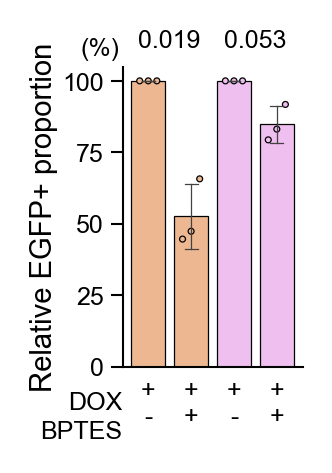

In [37]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1/7*4 +1/70*2]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

sns.barplot(data=data, x="Cond_Treat", y="value",
            palette=['#EDB891','#EDB891','#EFBFEF','#EFBFEF'], saturation=1,
            width=0.8,
            errorbar='sd', err_kws={"linewidth": 0.3}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

ax.scatter([-0.2,0,0.2, 0.8,1,1.2, 1.8,2,2.2, 2.8,3,3.2],
           data['value'],
           c=['#EDB891']*6+['#EFBFEF']*6,
           s=2, linewidth=0.3, edgecolor='k')

# sns.stripplot(data=data, x="Cond_Treat", y="value",
#               palette=['#EDB891','#EDB891','#EFBFEF','#EFBFEF'],
#               size=2, linewidth=0.3, edgecolor='k',
#               jitter=False,
#               legend=False)
# for i in range(len(data_dict['Glu_noTreat'])):
#     ax.plot([0,1],
#             [data_dict['Glu_noTreat'][i], data_dict['Glu_BPTES'][i]],
#             c='k', lw=0.2)
# for i in range(len(data_dict['Ala_noTreat'])):
#     ax.plot([2,3],
#             [data_dict['Ala_noTreat'][i], data_dict['Ala_BPTES'][i]],
#             c='k', lw=0.2)

ax.set_xlim(-0.6, 3.6)
ax.set_xticks([*range(4)])
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['+\n-','+\n+','+\n-','+\n+'], rotation=0, ha='center')
ax.set_yticklabels([0, 25, 50, 75, 100])
ax.tick_params(width=0.5, length=3, pad=1.5)
ax.tick_params(axis='x', length=0, pad=3)
ax.text(-0.02, 1.02, '(%)', transform=ax.transAxes, ha='right', va='bottom', fontsize=6)

ax.text(-0.6,-0.15,'DOX', ha='right',fontsize=6)
ax.text(-0.6,-0.25,'BPTES', ha='right',fontsize=6)

ax.set_xlabel('')
ax.set_ylabel('Relative EGFP+ proportion', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# paired T-test
from scipy import stats

stat, pv = stats.ttest_rel(data_dict['Glu_noTreat'], data_dict['Glu_BPTES'])
ax.text(0.5, 1.1,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)

stat, pv = stats.ttest_rel(data_dict['Ala_noTreat'], data_dict['Ala_BPTES'])
ax.text(2.5, 1.1,f'{pv:.3f}', horizontalalignment='center', verticalalignment='bottom', fontsize=6, color='k', rotation=0)


## Show and save the plot
plt.savefig('Glu-Ala_Tet-DOX-BPTES_reporter_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()